In [1]:
import numpy as np
from numpy import random as npr
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
transition = np.array( [ [ 0.9,0.1 ],[ 0.4,0.6 ] ] )
emission   = np.array( [ [ 0.8,0.1,0.1 ],[ 0.2,0.3,0.5 ] ] )

hiddenStateList = np.array( [ 1,2 ] );      # all possible states
observationList = np.array( [ 1,2,3 ] );    # all possible observations

In [3]:
n = 100
states = np.zeros( ( n, ),dtype=np.int )
obs    = np.zeros( ( n, ),dtype=np.int )

states[ 0 ] = 2     # starting state (hidden from model)
probVector = emission[ hiddenStateList == states[ 0 ] ]

id = ( np.cumsum( probVector ) >= npr.rand() ).tolist().index( True )
obs[ 0 ] = observationList[ id ]

for i in range( 1,n ):
    probVector = transition[ hiddenStateList == states[ i-1 ] ]
    id = ( np.cumsum( probVector ) >= npr.rand() ).tolist().index( True )
    states[ i ] = hiddenStateList[ id ]

    probVector = emission[ hiddenStateList == states[ i ] ]
    id = ( np.cumsum( probVector ) >= npr.rand() ).tolist().index( True )
    obs[ i ] = observationList[ id ]

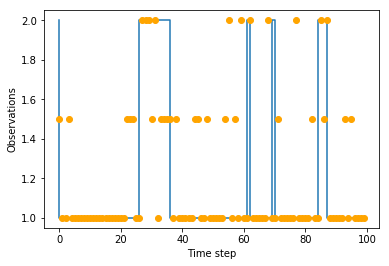

In [4]:
fig,ax = plt.subplots()
ax.step( range( len( states ) ),states )
ax.plot( range( len( obs ) ),obs/2+0.5,color='orange',linestyle='',marker='o' )
plt.xlabel( 'Time step' )
plt.ylabel( 'Observations' )
plt.show()

In [5]:
transition = np.array( [ [ 0.9,0.1 ],[ 0.4,0.6 ] ] )
emission   = np.array( [ [ 0.8,0.1,0.1 ],[ 0.2,0.3,0.5 ] ] )

from hmmlearn import hmm
model = hmm.MultinomialHMM( n_components=2 )

model.startprob_ = np.array( [ 1.0,0.0 ] )  # start as 'rainy'
model.transmat_  = transition
model.n_features    = 3
model.emissionprob_ = emission

obs -= 1
obs.shape = ( obs.shape[ 0 ],1 )
logprob,states_ = model.decode( obs )

ModuleNotFoundError: No module named 'hmmlearn'

In [ ]:
from hmmlearn import hmm